In [137]:
import pandas as pd
import nltk
import numpy as np
nltk.download('words')
from nltk.corpus import words
from collections import Counter


[nltk_data] Downloading package words to
[nltk_data]     /Users/Vaibhav_Beohar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [52]:
chats = pd.read_csv('cloakzy1.csv')

In [138]:
print(f'Total chats: {len(chats)}')
num_words = [len(sentence.split()) for sentence in chats.text.tolist()]
print(f'Total words in all chats: {sum(num_words)}')

Total chats: 182
Total words in all chats: 1118


In [139]:
# adapted from https://stackoverflow.com/questions/70771697/find-character-occurance-percentage-from-a-list-of-words
total_word_list = [word for sentence in chats.text.tolist() for word in sentence.split()]
ounter = Counter(total_word_list)
occ_pct = [(char, occ, occ / sum(num_words) * 100) for char, occ in counter.most_common()]
for word, occ, pct in occ_pct:
   print(word, '\t\t', occ, '\t\t', f"{pct:.2f}%")

cloakPotato 		 33 		 2.95%
the 		 31 		 2.77%
you 		 21 		 1.88%
cloakB 		 21 		 1.88%
in 		 17 		 1.52%
I 		 15 		 1.34%
a 		 15 		 1.34%
is 		 13 		 1.16%
that 		 11 		 0.98%
of 		 10 		 0.89%
this 		 10 		 0.89%
no 		 10 		 0.89%
lol 		 9 		 0.81%
and 		 8 		 0.72%
RP 		 7 		 0.63%
i 		 7 		 0.63%
for 		 7 		 0.63%
" 		 7 		 0.63%
was 		 7 		 0.63%
masters 		 7 		 0.63%
cloakTFUE 		 7 		 0.63%
got 		 6 		 0.54%
just 		 6 		 0.54%
has 		 6 		 0.54%
are 		 6 		 0.54%
your 		 6 		 0.54%
did 		 6 		 0.54%
to 		 6 		 0.54%
it 		 6 		 0.54%
one 		 5 		 0.45%
so 		 5 		 0.45%
on 		 5 		 0.45%
her 		 5 		 0.45%
game 		 5 		 0.45%
here 		 5 		 0.45%
LUL 		 5 		 0.45%
cloakWave 		 5 		 0.45%
= 		 4 		 0.36%
| 		 4 		 0.36%
been 		 4 		 0.36%
how 		 4 		 0.36%
where 		 4 		 0.36%
my 		 4 		 0.36%
bro 		 4 		 0.36%
he 		 4 		 0.36%
EZ=z 		 4 		 0.36%
mag 		 4 		 0.36%
when 		 4 		 0.36%
cloak20 		 4 		 0.36%
missed 		 3 		 0.27%
days 		 3 		 0.27%
hospital 		 3 		 0.27%
chat 		 3 		 0.27%
what 

## Frequency distribution of chat lengths

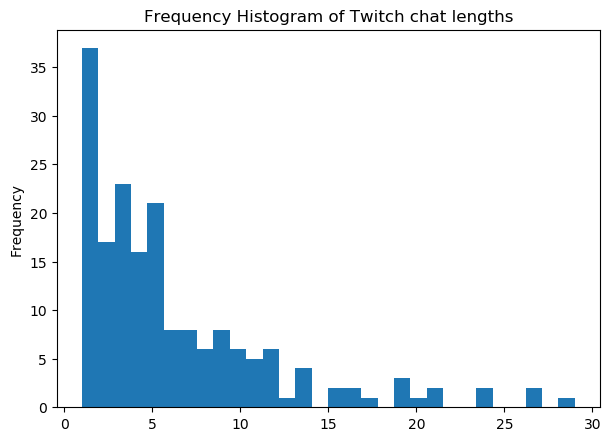

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(num_words, bins=30)
plt.gca().set(title='Frequency Histogram of Twitch chat lengths', ylabel='Frequency');

## Frequency distribution of all caps words occuring in Twitch chats

In [145]:
all_caps_words = [str(word.isupper()) for sentence in chats.text.tolist() for word in sentence.split()]

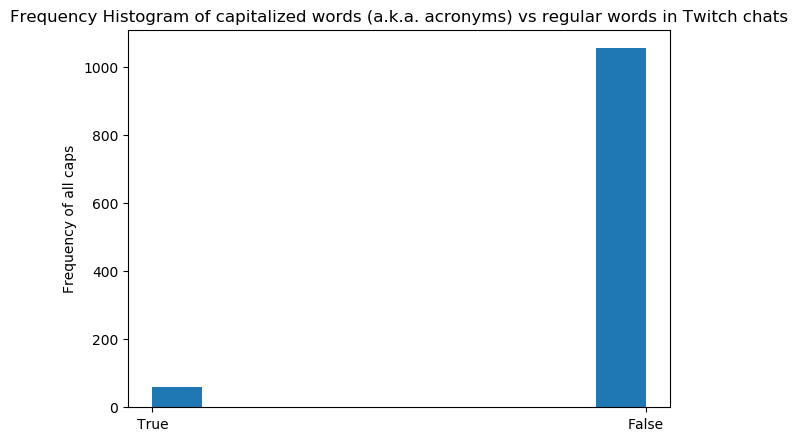

In [146]:
plt.hist(all_caps_words, bins=10)
plt.gca().set(title='Frequency Histogram of capitalized words\
 (a.k.a. acronyms) vs regular words in Twitch chats', ylabel='Frequency of all caps');

## Actual words vs. non-words in Twitch chats

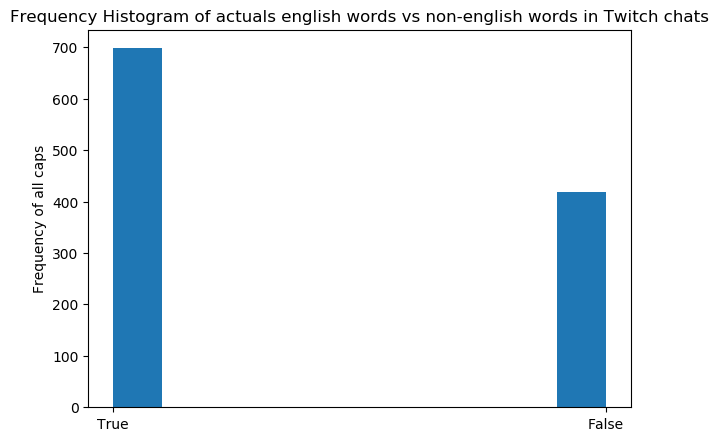

In [148]:
setofwords = set(words.words())

def is_a_word(word):
    return word in setofwords

is_word = [str(is_a_word(word.lower())) for sentence in chats.text.tolist() for word in sentence.split()]

plt.hist(is_word, bins=10)
plt.gca().set(title='Frequency Histogram of actuals english words\
 vs non-english words in Twitch chats', ylabel='Frequency of all caps');

## Emotes vs. non-emotes

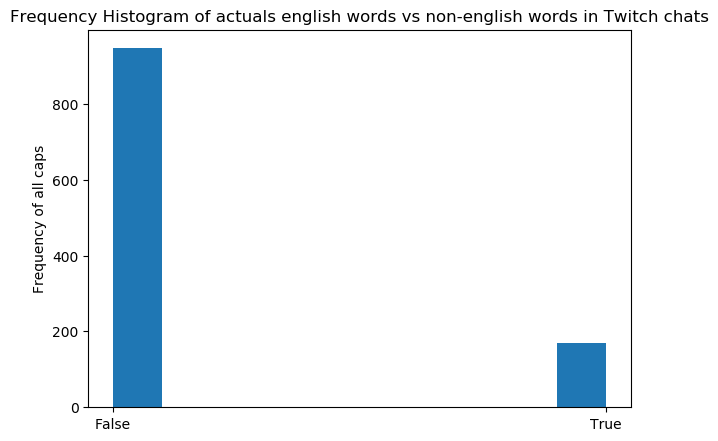

In [144]:
def is_camel_case(s):
    return s != s.lower() and s != s.upper() and "_" not in s

is_emote = [str(is_camel_case(word)) for sentence in chats.text.tolist() for word in sentence.split()]

plt.hist(is_emote, bins=10)
plt.gca().set(title='Frequency Histogram of actuals english words\
 vs non-english words in Twitch chats', ylabel='Frequency of all caps');